In [7]:
import utils
import skimage
import skimage.morphology
import numpy as np
import pathlib
import matplotlib.pyplot as plt


In [8]:
import numpy as np
import skimage.morphology

def distance_transform(im: np.ndarray) -> np.ndarray:
    """
    A function that computes the distance to the closest boundary pixel using iterative erosion.
    
    Args:
        im: np.ndarray of shape (H, W) with boolean values (dtype=bool)
    
    Returns:
        np.ndarray of shape (H, W). dtype=np.int32
    """
    ### START YOUR CODE HERE ###
    assert im.dtype == bool, "Input image must be of type bool"

    # Define the 3x3 structuring element for chessboard distance
    structuring_element = np.array([
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]
    ], dtype=bool)

    # Initialize the result matrix to store the distance for each pixel
    H, W = im.shape
    result = np.zeros((H, W), dtype=np.int32)

    # Copy the input image to perform erosion
    erosion_image = im.copy()
    distance = 0

    # Iteratively apply erosion until the image is completely eroded
    while np.any(erosion_image):  # While there are still foreground pixels
        distance += 1
        # Erode the image
        erosion_image = skimage.morphology.binary_erosion(erosion_image, structuring_element)
        # Update the result matrix for pixels that are still present
        result[erosion_image] = distance

    # Normalize the result to fit in the range 0-255 for grayscale visualization
    max_distance = np.max(result)
    if max_distance > 0:  # Avoid division by zero
        result = (result / max_distance * 255).astype(np.int32)
    
    return result
    ### END YOUR CODE HERE ###


Reading image: image_processed\noisy-filtered.png
Saving image to: image_processed\noisy-distance.png


c:\Users\Martynas\Desktop\Martynas\SKOLE\NTNU 5\Visuell Databehandling\LABS\TDT4195_Image_Processing\Assignment 3\utils.py:40: UserWarning: Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)
  warnings.warn("Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)")


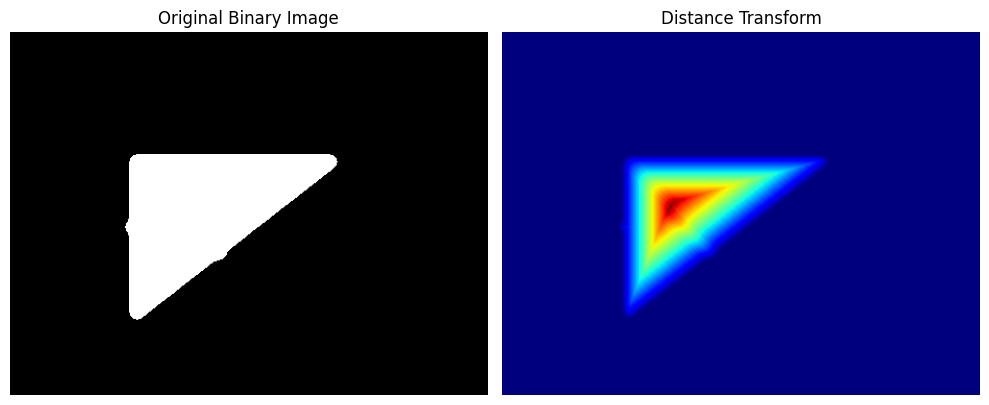

In [9]:
if __name__ == "__main__":
    im = utils.read_image("noisy-filtered.png", image_folder=pathlib.Path("image_processed"))  # Read filtered image
    binary_image = (im != 0)  # Convert to binary
    
    # Compute the distance transform
    distance = distance_transform(binary_image)

    # Assertions
    assert im.shape == distance.shape, "Expected image shape ({}) to be same as resulting image shape ({})".format(
            im.shape, distance.shape)
    assert distance.dtype == np.int32, "Expected resulting image dtype to be np.int32. Was: {}".format(
            distance.dtype)

    # Save the distance transform result
    distance = utils.to_uint8(distance)
    utils.save_im("noisy-distance.png", distance)

    # Display the original binary image and the distance-transformed image
    plt.figure(figsize=(10, 5))
    
    # Original Binary Image
    plt.subplot(1, 2, 1)
    plt.imshow(binary_image, cmap="gray")
    plt.title("Original Binary Image")
    plt.axis("off")
    
    # Distance-Transformed Image
    plt.subplot(1, 2, 2)
    plt.imshow(distance, cmap="jet")  # Use 'jet' colormap for better visualization of distances
    plt.title("Distance Transform")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()